In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import sklearn.datasets as dt
from sklearn.linear_model import LogisticRegression

### Задача №1

In [129]:
# Создадим датасет с 2-мя переменными и бинарным у
N = 300
x,y = dt.make_classification(n_samples=N, n_features=2, n_repeated=0, class_sep=2, n_redundant=0)

In [130]:
y[0:10]

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0])

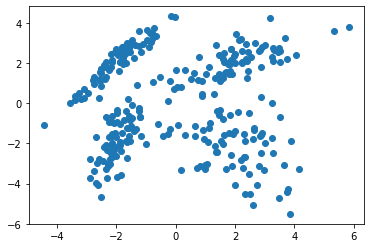

In [131]:
plt.scatter(x[:,0], x[:,1])
plt.show()

In [132]:
# Обучим на данных нашу модель логистической регрессии
model = LogisticRegression()
model.fit(x, y)

LogisticRegression()

In [133]:
# Посмотрим на получившиеся коэффициенты
print(model.intercept_)
print(model.coef_)

[1.10946015]
[[ 2.65412744 -0.36168877]]


In [135]:
# Функция сигмоида
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [136]:
EPOCHS = 500
LEARNING_RATE = 0.01
costs = []
params = []
predictions = []
params = [1,1,1]

In [137]:
params

[1, 1, 1]

In [138]:
for _ in range(EPOCHS):
    prediction = sigmoid(params[0] + params[1] * x[:,0] + params[2] * x[:,1])
    predictions.append(prediction)
    
    cost = - np.sum(y * np.log(prediction) + (1-y)*np.log(1-prediction)) / (N)
    costs.append(cost)
    
    params[0] -= LEARNING_RATE * np.sum(prediction - y) / len(predictions)
    params[1] -= LEARNING_RATE * np.sum((prediction - y) * x[:,0]) / len(predictions)
    params[2] -= LEARNING_RATE * np.sum((prediction - y) * x[:,1]) / len(predictions)
    
    #print("t0:", params[0], "t1:", params[1], "t2:", params[2], "cost:", cost)

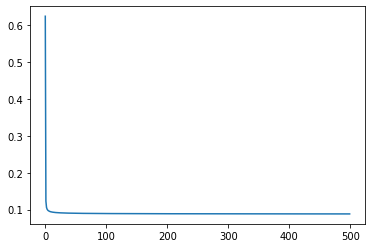

In [139]:
plt.plot(costs)

In [140]:
params

[0.8318746470509805, 2.6474862070853944, -0.4144452575778042]

### Метод nesterov momentum

In [175]:
# В основном берется значение коэффициента сохранения равное 0.9
costs_n=[]
predictions_n = []
params_n = [1,1,1]
momentum = 0.9
pred=[]

v0 = 0
v1 = 0
v2 = 0

eps = np.sqrt(np.finfo(float).eps)

In [176]:
for _ in range(EPOCHS):
    prediction_n = sigmoid(params_n[0] + params_n[1] * x[:,0] + params_n[2] * x[:,1])
    predictions_n.append(prediction_n)
    
    cost_n = - np.sum(y * np.log(prediction_n) + (1-y)*np.log((1+eps)-prediction_n)) / (N)
    costs_n.append(cost_n)
    
    pr_v0 = v0
    pr_v1 = v1
    pr_v2 = v2
    
    v0 = momentum * pr_v0 + LEARNING_RATE * ( np.sum(prediction_n - y) / len(predictions_n) )
    v1 = momentum * pr_v1 + LEARNING_RATE * ( np.sum((prediction_n - y) * x[:,0]) / len(predictions_n) )
    v2 = momentum * pr_v2 + LEARNING_RATE * ( np.sum((prediction_n - y) * x[:,1]) / len(predictions_n) )
    
    
    params_n[0] -= v0
    params_n[1] -= v1
    params_n[2] -= v2

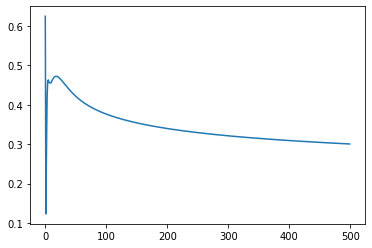

In [177]:
plt.plot(costs_n)
plt.show()

In [178]:
params_n

[2.5949828275529807, 18.07823378024975, -4.57712090438094]

### Метод rmsprop

In [168]:
# В основном берется значение коэффициента сохранения равное 0.9
costs_r=[]
params_r = [1,1,1]

grad_sqr_0 = 0
grad_sqr_1 = 0
grad_sqr_2 = 0

momentum = 0.9
predictions_r = []

In [169]:
for _ in range(EPOCHS):
    prediction_r = sigmoid(params_r[0] + params_r[1] * x[:,0] + params_r[2] * x[:,1])
    predictions_r.append(prediction_r)
    
    cost_r = - np.sum(y * np.log(prediction_r) + (1-y)*np.log(1-prediction_r)) / (N)
    costs_r.append(cost_r)
    
    # Находим производные
    dt0 = np.sum(prediction_r - y) / len(predictions_r)
    dt1 = np.sum((prediction_r - y) * x[:,0]) / len(predictions_r)
    dt2 = np.sum((prediction_r - y) * x[:,1]) / len(predictions_r)
    
    grad_sqr_0 = momentum * grad_sqr_0 + (1 - momentum) * dt0**2
    grad_sqr_1 = momentum * grad_sqr_1 + (1 - momentum) * dt1**2
    grad_sqr_2 = momentum * grad_sqr_2 + (1 - momentum) * dt2**2
    
    params_r[0] += -LEARNING_RATE * dt0 / (np.sqrt(grad_sqr_0) + 1e-7)
    params_r[1] += -LEARNING_RATE * dt1 / (np.sqrt(grad_sqr_1) + 1e-7)
    params_r[2] += -LEARNING_RATE * dt2 / (np.sqrt(grad_sqr_2) + 1e-7)

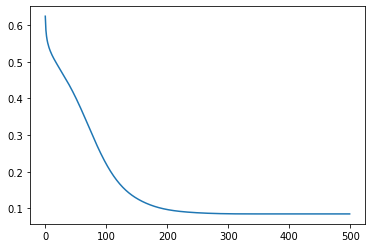

In [170]:
plt.plot(costs_r)
plt.show()

In [171]:
params_r

[1.495011361281961, 3.170842182506906, -0.4557297190148701]